In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv(r"C:\Users\aakan\OneDrive\Desktop\Project\Online payments fraud detection using ml\credit card.csv")
print(data.head())
print(data.info())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 co

In [5]:
new_type = pd.get_dummies(data['type'],drop_first=True)
new_data = pd.concat([data,new_type],axis=1)
new_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


In [6]:
x = new_data.drop(['isFraud','type','nameOrig','nameDest'],axis=1)
y = new_data['isFraud']

In [9]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

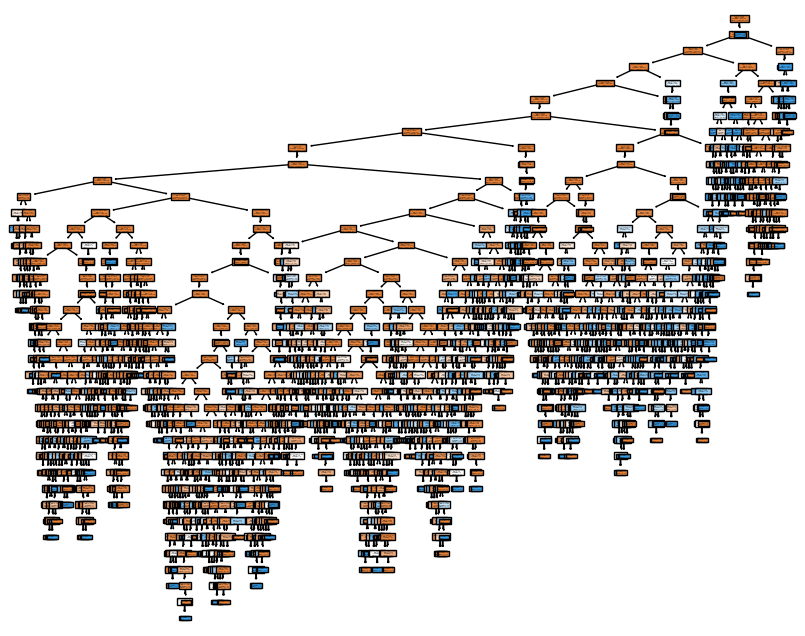

In [10]:
dt = DecisionTreeClassifier()
dt.fit(x,y)
plt.figure(figsize=(10,8))
plot_tree(dt,filled=True)
plt.show()

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.10)
ypred = dt.predict(x_test)
from sklearn import metrics
print("\n Confusion Matrix:\n",metrics.confusion_matrix(y_test,ypred))
print("\n----------------------------------------------------------\n")
print("\n Classification Report:\n",metrics.classification_report(y_test,ypred))
print("\n----------------------------------------------------------\n")
print("\n Accuracy:\n",metrics.accuracy_score(y_test,ypred))


 Confusion Matrix:
 [[635430      0]
 [     0    832]]

----------------------------------------------------------


 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    635430
           1       1.00      1.00      1.00       832

    accuracy                           1.00    636262
   macro avg       1.00      1.00      1.00    636262
weighted avg       1.00      1.00      1.00    636262


----------------------------------------------------------


 Accuracy:
 1.0
